Nous possédons donc 2 datasets:

    - le fichier rassemblant les caractéristiques fondamentales d'un échantillon de vidéos youtube
    - le fichier détaillé des caractéristiques et du temps de transcodage

In [49]:
%autosave 60
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

import itertools
import sklearn.linear_model as models # import all modells
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

Autosaving every 60 seconds


# Datasets (2 fichiers): Imports et Traitement

In [50]:
transcoding_mesurment = pd.read_csv("datasets/transcoding_mesurment.tsv",sep='\t')
youtube_videos = pd.read_csv("datasets/youtube_videos.tsv",sep='\t')

In [51]:
transcoding_mesurment.shape

(68784, 22)

Le dataset transcoding_mesurment est donc composé de 68784 lignes et 22 colonnes.

In [52]:
youtube_videos.shape

(168286, 11)

Le dataset youtube_videos est lui composé de 68784 lignes et 22 colonnes.

Observons maintenant un aperçu des datasets:

In [53]:
youtube_videos

,id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url
0,uDNj-_5ty48,267,373,274,568,320,29.97,0.00,h264,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
1,uDNj-_5ty48,267,512,396,480,270,29.97,29.97,h264,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
2,uDNj-_5ty48,267,324,263,400,226,29.97,29.97,flv1,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
3,uDNj-_5ty48,267,85,55,176,144,12.00,12.00,mpeg4,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
4,WCgt-AactyY,31,1261,1183,640,480,24.00,0.00,h264,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...
...,...,...,...,...,...,...,...,...,...,...,...
168281,ehHw-P9S4lU,68,816,560,480,360,29.97,29.97,vp8,Music,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...
168282,ehHw-P9S4lU,68,340,273,320,240,29.97,29.97,flv1,Music,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...
168283,ehHw-P9S4lU,68,81,55,176,144,12.00,12.00,mpeg4,Music,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...
168284,MzjT-56gXno,285,1290,1181,854,480,29.97,0.00,h264,Sports,http://r4---sn-ovgq0oxu-5goe.c.youtube.com/vid...


La table youtube_videos présente les caractéristiques principales d'un nombre de vidéos postées sur youtube.

In [54]:
transcoding_mesurment

,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,...,825054,0,889537,mpeg4,56000,12.00,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,...,825054,0,889537,mpeg4,56000,12.00,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,...,825054,0,889537,mpeg4,56000,12.00,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,...,825054,0,889537,mpeg4,56000,12.00,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,...,825054,0,889537,mpeg4,56000,12.00,1280,720,58528,3.456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68779,ZWEN-71BqPs,972.27100,h264,480,360,278822,29.000000,560,28580,0,...,26561730,0,33886358,flv,242000,24.00,640,480,88692,1.552
68780,zWQN-bqqg0o,129.88100,vp8,640,480,639331,30.162790,36,3855,0,...,9503846,0,10379630,mpeg4,539000,29.97,1920,1080,107524,18.557
68781,zX17-vi0sqQ,249.68000,vp8,320,240,359345,25.068274,129,6113,0,...,9456514,0,11215178,flv,539000,12.00,176,144,88708,0.752
68782,zyiT-TzxIpk,183.62334,h264,1280,720,2847539,29.000000,98,5405,0,...,60113035,0,65359329,mpeg4,539000,12.00,320,240,88724,5.444


La table transcoding_mesurment quant à elle offre plus de détails, notamment quant aux caractéristiques d'input et output, ainsi que la durée de transcodage et les ressources mémoires nécessaires.

Nous allons à présent traiter nos datasets afin de ne retenir que l'information utile à notre étude.
Les ids et les urls ne présentent pas d'intérêts, n'affectant pas le temps de transcodage. Nous pouvons donc les supprimer. Nous avons également décidé de supprimer la colonne d'estimation du framerate afin d'améliorer la précision de nos résultats - ils semblent être similaires au framerate ou d'une valeur de 0.

In [55]:
transcoding_mesurment = transcoding_mesurment.drop(['id'],axis=1)
transcoding_mesurment

,duration,codec,width,height,bitrate,framerate,i,p,b,frames,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,...,825054,0,889537,mpeg4,56000,12.00,176,144,22508,0.612
1,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,...,825054,0,889537,mpeg4,56000,12.00,320,240,25164,0.980
2,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,...,825054,0,889537,mpeg4,56000,12.00,480,360,29228,1.216
3,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,...,825054,0,889537,mpeg4,56000,12.00,640,480,34316,1.692
4,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,...,825054,0,889537,mpeg4,56000,12.00,1280,720,58528,3.456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68779,972.27100,h264,480,360,278822,29.000000,560,28580,0,29140,...,26561730,0,33886358,flv,242000,24.00,640,480,88692,1.552
68780,129.88100,vp8,640,480,639331,30.162790,36,3855,0,3891,...,9503846,0,10379630,mpeg4,539000,29.97,1920,1080,107524,18.557
68781,249.68000,vp8,320,240,359345,25.068274,129,6113,0,6242,...,9456514,0,11215178,flv,539000,12.00,176,144,88708,0.752
68782,183.62334,h264,1280,720,2847539,29.000000,98,5405,0,5503,...,60113035,0,65359329,mpeg4,539000,12.00,320,240,88724,5.444


In [56]:
youtube_videos = youtube_videos.drop(['id','frame rate(est.)', 'url'], axis=1)
youtube_videos

,duration,bitrate,bitrate(video),height,width,frame rate,codec,category
0,267,373,274,568,320,29.97,h264,Music
1,267,512,396,480,270,29.97,h264,Music
2,267,324,263,400,226,29.97,flv1,Music
3,267,85,55,176,144,12.00,mpeg4,Music
4,31,1261,1183,640,480,24.00,h264,People & Blogs
...,...,...,...,...,...,...,...,...
168281,68,816,560,480,360,29.97,vp8,Music
168282,68,340,273,320,240,29.97,flv1,Music
168283,68,81,55,176,144,12.00,mpeg4,Music
168284,285,1290,1181,854,480,29.97,h264,Sports


A présent, identifions les types de données avec lesquelles nous travaillons 

In [57]:
youtube_videos.dtypes

duration            int64
bitrate             int64
bitrate(video)      int64
height              int64
width               int64
frame rate        float64
codec              object
category           object
dtype: object

In [58]:
transcoding_mesurment.dtypes

duration       float64
codec           object
width            int64
height           int64
bitrate          int64
framerate      float64
i                int64
p                int64
b                int64
frames           int64
i_size           int64
p_size           int64
b_size           int64
size             int64
o_codec         object
o_bitrate        int64
o_framerate    float64
o_width          int64
o_height         int64
umem             int64
utime          float64
dtype: object

Nous observons donc une quantité importante de paramètres quantitatifs - dès lors, nous devons proposer une réponse quantitative au problème.

Nous pouvons également constater que certains paramètres sont des "objets" - corrigeons le type afin d'éviter de potentiels problèmes.
Il s'agit des colonnes "codec" et "o_codec" pour transcoding_mesurment, "category" et "codec" pour youtube_videos.

In [59]:
transcoding_mesurment = transcoding_mesurment.astype({'codec':'category', 'o_codec':'category'})

In [60]:
youtube_videos = youtube_videos.astype({'codec':'category', 'category':'category'})

Vérifions les nouveaux types:

In [61]:
transcoding_mesurment['codec']

0        mpeg4
1        mpeg4
2        mpeg4
3        mpeg4
4        mpeg4
         ...  
68779     h264
68780      vp8
68781      vp8
68782     h264
68783    mpeg4
Name: codec, Length: 68784, dtype: category
Categories (4, object): ['flv', 'h264', 'mpeg4', 'vp8']

Nous avons 4 types de codec: "flv, h264, mpeg4, vp8"

Nous pouvons vérifier avec o_codec

In [62]:
transcoding_mesurment['o_codec']

0        mpeg4
1        mpeg4
2        mpeg4
3        mpeg4
4        mpeg4
         ...  
68779      flv
68780    mpeg4
68781      flv
68782    mpeg4
68783     h264
Name: o_codec, Length: 68784, dtype: category
Categories (4, object): ['flv', 'h264', 'mpeg4', 'vp8']

In [63]:
youtube_videos['category']

0                  Music
1                  Music
2                  Music
3                  Music
4         People & Blogs
               ...      
168281             Music
168282             Music
168283             Music
168284            Sports
168285            Sports
Name: category, Length: 168286, dtype: category
Categories (16, object): ['Autos & Vehicles', 'Comedy', 'Education', 'Entertainment', ..., 'Science & Technology', 'Shows', 'Sports', 'Travel & Events']

Nous avons 16 catégories.

# Plots

Notre dataset est maintenant prêt a être analysé. Nous pouvons commencer à visualiser nos données en plots afin d'observer les impacts des différents paramètres.

<AxesSubplot:title={'center':'temps de vidéo par catégorie par codec'}, xlabel='codec'>

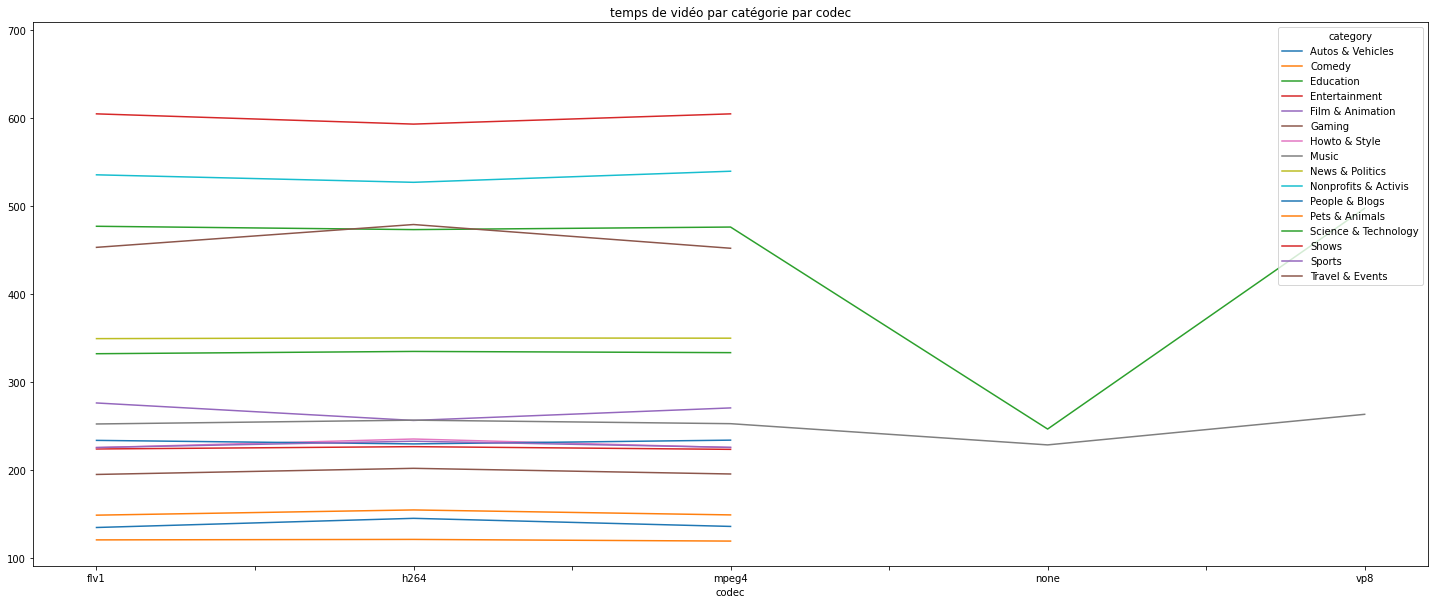

In [64]:
pivotable_duration = youtube_videos.pivot_table('duration',index='codec',columns='category')
pivotable_duration.plot(figsize=(25,10),title="temps de vidéo par catégorie par codec")

Nous avons commencé par l'impact de la catégorie et du codec d'input sur le temps de vidéo. Nous pouvons remarquer d'une façon générale que seule la catégorie influence le temps de vidéo; par exemple les vidéos de catégorie "Entertainment" sont plus longues que les vidéos de catégorie "Autos & Véhicules". Nous pouvons observer de très légères variations lors du changement de codec mais ces derniers ne sont pas assez significants pour mesurer un réel impact.

<AxesSubplot:title={'center':'Bitrate par categorie par codec'}, xlabel='codec'>

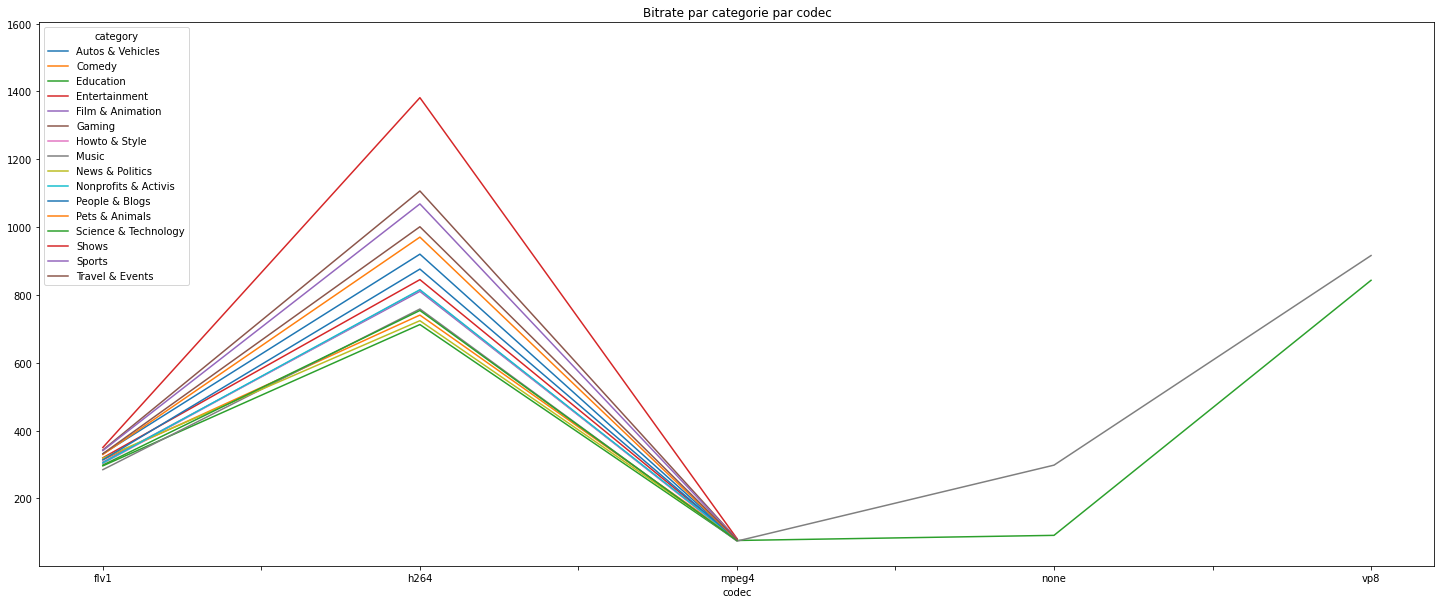

In [65]:
pivotable_category = youtube_videos.pivot_table('bitrate',index='codec',columns='category')
pivotable_category.plot(figsize=(25,10),title="Bitrate par categorie par codec")

La catéorie influe légèrement sur le bitrate, mais une fois de plus les écarts ne sont pas assez significants pour mesurer un vrai impact (le bitrate plus important de la catégorie "Entertainment" peut être expliqué par de plus longues durées comme nous avons vu précedemment). A l'inverse, lle codec d'input semble avoir un impact notable sur le bitrate. On peut également supposer donc que la durée de la vidéo a un impact sur le bitrate

<AxesSubplot:title={'center':'Frame rate par category par codec'}, xlabel='codec'>

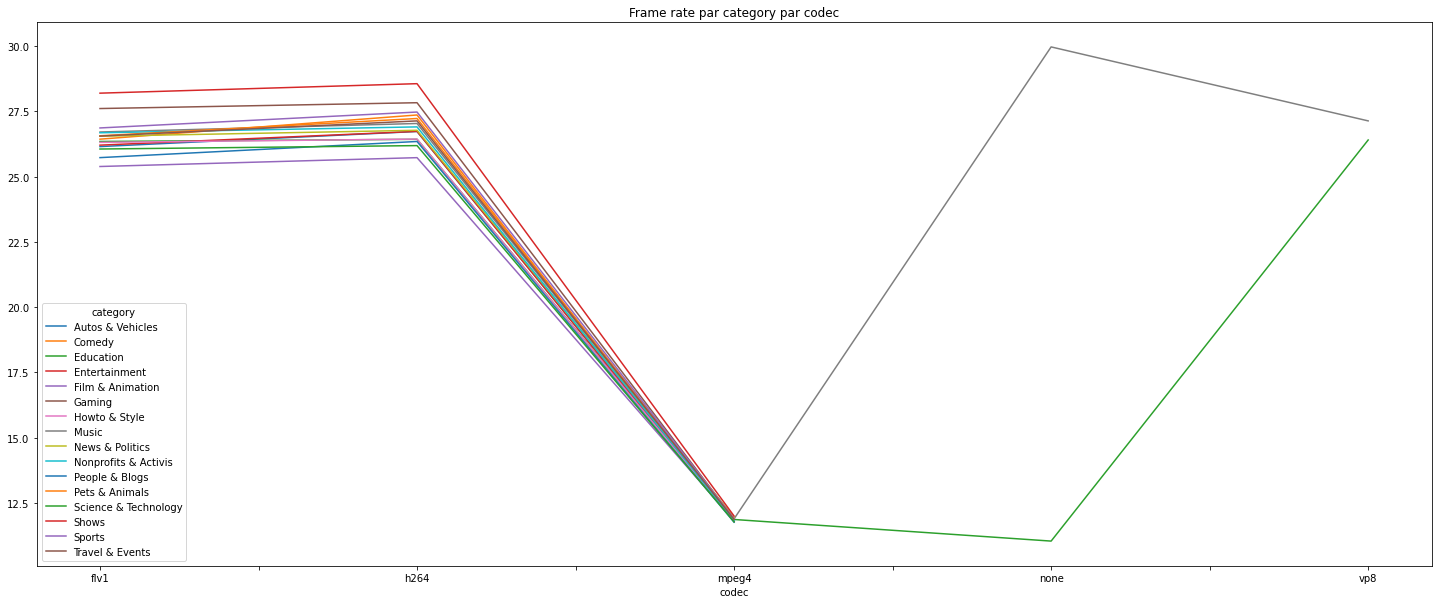

In [66]:
pivotable_framerate = youtube_videos.pivot_table('frame rate',index='codec',columns='category')
pivotable_framerate.plot(figsize=(25,10),title="Frame rate par category par codec")

Ici encore, on peut observer que le choix de codec d'entrée semble impacter le frame rate de la vidéo. 

Nous atteignons la limite de paramètres à étudier pour la table youtube_videos. Intéressons-nous à présent à la table transcoding_mesurments.

Dans un premier temps, observons l'impact de différents paramètres sur le temps de transcodage

<AxesSubplot:title={'center':'Influence du bitrate sur le temps de transcodage'}, xlabel='bitrate', ylabel='temps'>

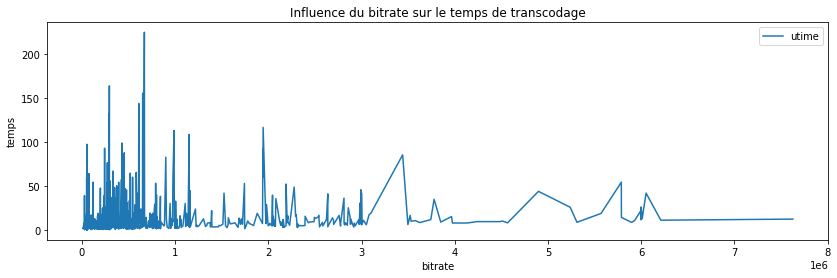

In [67]:
pivot_bitrate_time = transcoding_mesurment.pivot_table('utime',index='bitrate')
pivot_bitrate_time.plot(figsize=(14,4),title="Influence du bitrate sur le temps de transcodage", ylabel="temps")

<AxesSubplot:title={'center':"Influence du nombre d'images sur le temps de transcodage"}, xlabel='frames', ylabel='temps'>

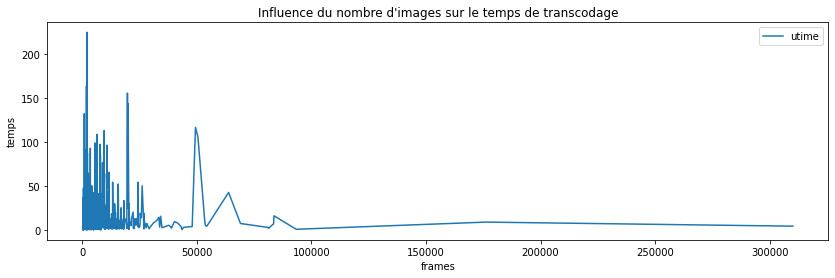

In [68]:
pivot_frame = transcoding_mesurment.pivot_table('utime',index='frames')
pivot_frame.plot(figsize=(14,4),title="Influence du nombre d'images sur le temps de transcodage", ylabel="temps")

<AxesSubplot:title={'center':'Influence du framerate sur le temps de transcodage'}, xlabel='framerate', ylabel='temps'>

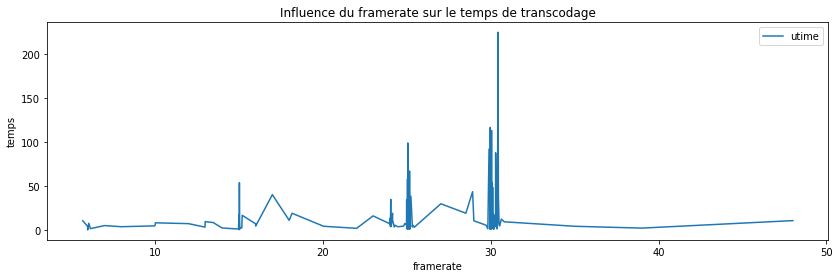

In [69]:
pivot_frmr = transcoding_mesurment.pivot_table('utime',index='framerate')
pivot_frmr.plot(figsize=(14,4),title="Influence du framerate sur le temps de transcodage", ylabel="temps")

<AxesSubplot:title={'center':'Influence de la taille sur le temps de transcodage'}, xlabel='size', ylabel='temps'>

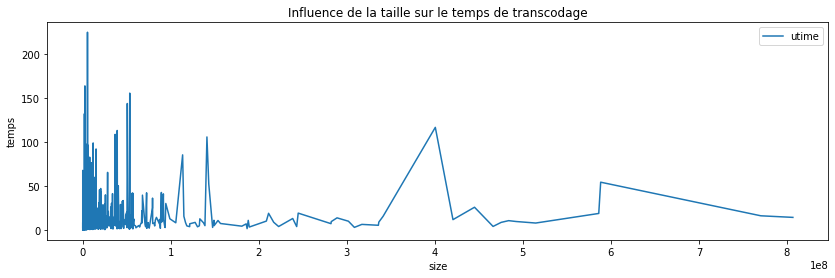

In [70]:
pivot_size = transcoding_mesurment.pivot_table('utime',index='size')
pivot_size.plot(figsize=(14,4),title="Influence de la taille sur le temps de transcodage", ylabel="temps")

<AxesSubplot:title={'center':"Influence de l'espace de mémoire sur le temps de transcodage"}, xlabel='umem', ylabel='temps'>

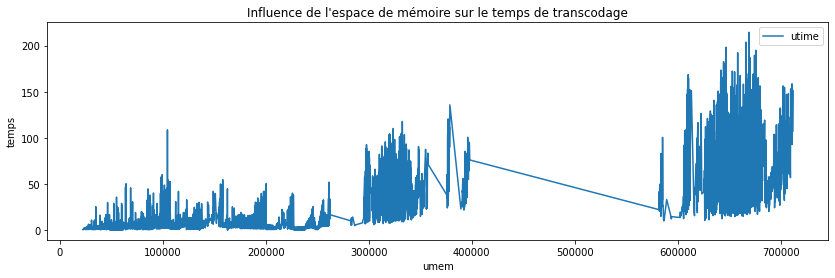

In [71]:
pivot_memory = transcoding_mesurment.pivot_table('utime',index='umem')
pivot_memory.plot(figsize=(14,4),title="Influence de l'espace de mémoire sur le temps de transcodage", ylabel="temps")

In [72]:
Temps_moyen=transcoding_mesurment.groupby("codec").duration.mean().sort_values()
Temps_moyen

codec
flv      167.734497
h264     232.381211
mpeg4    334.168552
vp8      392.064680
Name: duration, dtype: float64

In [73]:
Temps_omoyen=transcoding_mesurment.groupby("o_codec").duration.mean().sort_values()
Temps_omoyen

o_codec
h264     282.058180
flv      284.206285
mpeg4    289.133160
vp8      290.188299
Name: duration, dtype: float64

<AxesSubplot:ylabel='codec'>

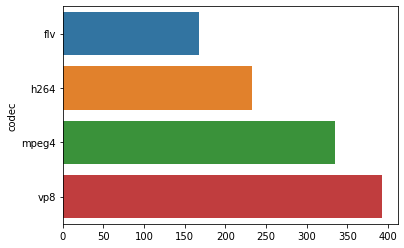

In [74]:
seaborn.barplot(y=Temps_moyen.index,x=Temps_moyen.values)

        Temps moyen de transcodage par codec d'input

<AxesSubplot:ylabel='o_codec'>

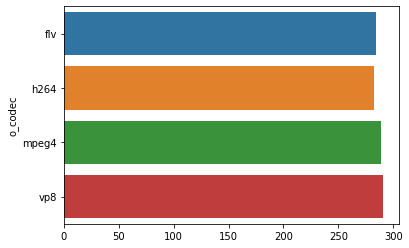

In [75]:
seaborn.barplot(y=Temps_omoyen.index,x=Temps_omoyen.values)

        Temps moyen de transcodage par codec d'ouput

Observons les différents plots obtenus. De façon logique, le temps d'encodage accélère à mesure que le birate augmente. Les 2 figures représentant l'influence du nombre d'images et du frame rate sur le temps d'encodage montrent que c'est la combinaison de ces 2 élements qui influe, un nombre d'image défini nécessitera un bitrate adapté pour otpimiser le temps d'encodage.
Le temps de transcodage est également plus long pour une taille et un espace en mémoire plus grand, ces éléments sont donc également correlés.
Enfin, c'est le choix du codec d'entrée qui semble particulièrement influencer le temps de transcodage. Il ne s'agit cependant que de moyennes.

Etudions plus en détails les différents paramètres afin de confirmer nos observations.

<AxesSubplot:title={'center':'Influence du bitrate sur le temps de transcodage par codec'}, xlabel='bitrate', ylabel='temps'>

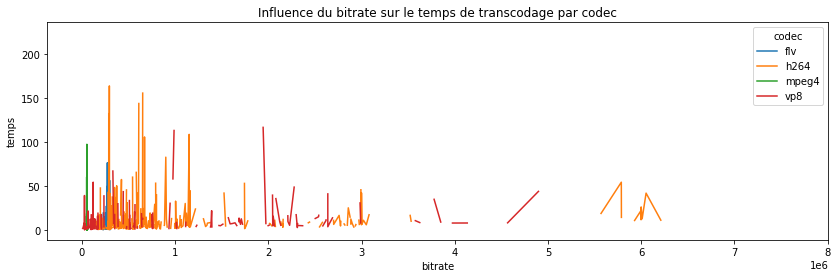

In [78]:
pivot_bitrate_codec = transcoding_mesurment.pivot_table('utime',index='bitrate', columns="codec")
pivot_bitrate_codec.plot(figsize=(14,4),title="Influence du bitrate sur le temps de transcodage par codec", ylabel="temps")

Si, de façon générale, l'augmentation du bitrate accélère le temps d'encodage, on remarque que le choix du codec peut également avoir un impact - on observe des temps très rapides, par exemple, pour le vp8 même avec un bitrate faible.

<AxesSubplot:title={'center':'Influence de la taille sur le temps de transcodage par codec'}, xlabel='size', ylabel='temps'>

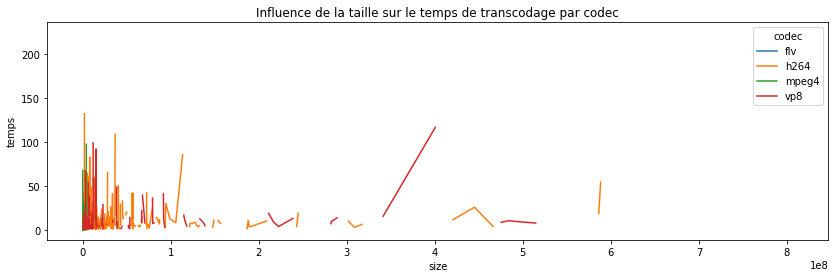

In [79]:
pivot_size_codec = transcoding_mesurment.pivot_table('utime',index='size', columns='codec')
pivot_size_codec.plot(figsize=(14,4),title="Influence de la taille sur le temps de transcodage par codec", ylabel="temps")

<AxesSubplot:xlabel='utime', ylabel='umem'>

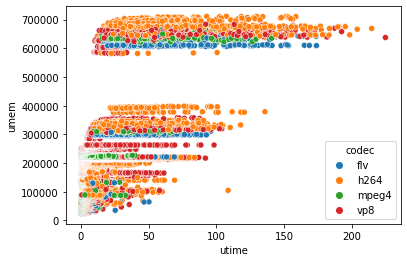

In [102]:
seaborn.scatterplot(x='utime', y='umem', hue = 'codec', data= transcoding_mesurment)

### Temps de transcodage et mémoire allouée en fonction du codec d'entrée

<AxesSubplot:xlabel='utime', ylabel='umem'>

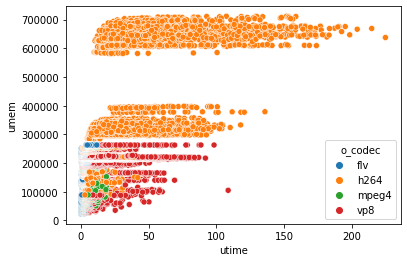

In [81]:
seaborn.scatterplot(x='utime', y='umem', hue = 'o_codec', data= transcoding_mesurment)

### Temps de transcodage et mémoire allouée en fonction du codec de sortie

Nous pouvons ici comparer les performances des codec avant et après transcodage en termes de temps et d'espace en mémoire. Nous confirmons d'une part que le temps de transcodage s'accroît pour un espace de mémoire plus grand. Nous pouvons également remarquer que le codecs et o_codecs h264 semblent demander plus de mémoire allouée que les autres. Le type de transcodage influence donc l'espace en mémoire en plus du temps de transcodage. 

Pour finir faisons une observation finale des correlations au sein du dataset

<AxesSubplot:>

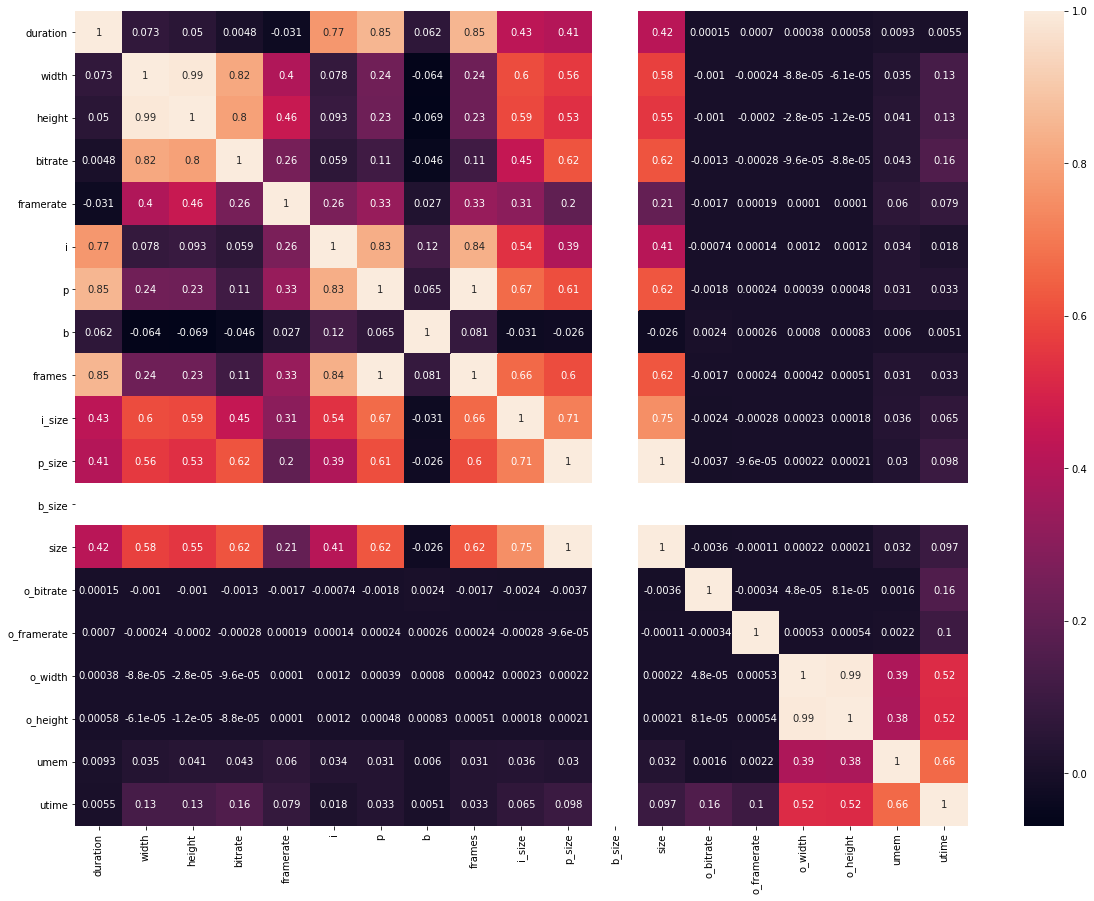

In [103]:
correlation = transcoding_mesurment.corr()
plt.subplots(figsize=(20,15))
seaborn.heatmap(correlation, annot=True)

A travers cette analyse, nous avons dégagé les différentes corrélations existantes entres les caractéristiques des vidéos youtube. Nous retenons principalement celles qui sont pertinentes à notre études, à savoir celles qui peuvent impacter de manière visible le temps de transcodage afin de mieux approcher nos estimations.

# Machine Learning 

In [83]:
import itertools
import sklearn.linear_model as models # import all modells
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

In [84]:
X = transcoding_mesurment.loc[:,transcoding_mesurment.columns != 'utime'] # on a besoin de tout sauf de la réponse "utime"
Y = transcoding_mesurment['utime'] #la réponse dans le dataset Y

In [85]:
X #toutes les données avec tous les paramètres

,duration,codec,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem
0,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.00,176,144,22508
1,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.00,320,240,25164
2,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.00,480,360,29228
3,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.00,640,480,34316
4,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.00,1280,720,58528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68779,972.27100,h264,480,360,278822,29.000000,560,28580,0,29140,7324628,26561730,0,33886358,flv,242000,24.00,640,480,88692
68780,129.88100,vp8,640,480,639331,30.162790,36,3855,0,3891,875784,9503846,0,10379630,mpeg4,539000,29.97,1920,1080,107524
68781,249.68000,vp8,320,240,359345,25.068274,129,6113,0,6242,1758664,9456514,0,11215178,flv,539000,12.00,176,144,88708
68782,183.62334,h264,1280,720,2847539,29.000000,98,5405,0,5503,5246294,60113035,0,65359329,mpeg4,539000,12.00,320,240,88724


In [86]:
Y #tous les utime

0         0.612
1         0.980
2         1.216
3         1.692
4         3.456
          ...  
68779     1.552
68780    18.557
68781     0.752
68782     5.444
68783     3.076
Name: utime, Length: 68784, dtype: float64

Nous allons premièrement diviser le dataset en 2 parties (training et testing set)

In [87]:
X_train_v1, X_test_v1, Y_train, Y_test = train_test_split(X, Y, test_size=0.5,random_state=0)

On a besoin de mettre à l'échelle toutes les unités, on va utiliser one hot encoder car les "codec" sont des catégories

In [88]:
scaler = StandardScaler()
one_hot_encoder = OneHotEncoder(sparse=False)

X_train_v2 = X_train_v1.drop(['codec','o_codec'],axis=1)

X_train_category = X_train_v1[['codec','o_codec']]

scaled_col = scaler.fit_transform(X_train_v2)
encoded_col = one_hot_encoder.fit_transform(X_train_category)

X_train = np.concatenate([scaled_col,encoded_col],axis=1)

X_test_v2 = X_test_v1.drop(['codec','o_codec'],axis=1)

X_test_category = X_test_v1[['codec','o_codec']]

scaled_col_test = scaler.transform(X_test_v2)
encoded_col_test = one_hot_encoder.transform(X_test_category)

X_test  = np.concatenate([scaled_col_test,encoded_col_test],axis=1)

On va pouvoir tester plusieurs modèles et analyser leur moyenne des moindres carrés (MSE) ainsi que leur coefficient de détermination R2.

In [89]:
r2_dict = {}
mse_dict = {}
#ceci nous permet de mettre tous nos résultats dans 2 dictionnaires.

In [90]:
#Linear regression

linear = models.LinearRegression()

linear.fit(X_train,Y_train)

pred_linear = linear.predict(X_test)

print(f"R2 est {linear.score(X_test,Y_test)* 100} % et MSE {mean_squared_error(Y_test,pred_linear)}.")

r2_dict["Logistic Regression"] = [round(linear.score(X_test,Y_test) * 100,2)]
mse_dict["Logistic Regression"]= [round(mean_squared_error(Y_test,pred_linear),2)]

cross_val = cross_val_score(linear,X_train,Y_train,cv=5)

print(f"\nPour la cross validation, on a {cross_val}")

R2 est 65.2393817185885 % et MSE 91.32267467892433.

Pour la cross validation, on a [0.65736539 0.64640725 0.65687633 0.64367643 0.66059539]


In [91]:
#SVR model
from sklearn.svm import SVR

svrmod = SVR()

svrmod.fit(X_train,Y_train)

pred_svr = svrmod.predict(X_test)

print(f"R2 est {svrmod.score(X_test,Y_test)* 100} % et MSE {mean_squared_error(Y_test,pred_svr)}.")

r2_dict["SVR Regression"] = [round(svrmod.score(X_test,Y_test) * 100,2)]
mse_dict["SVR Regression"]= [round(mean_squared_error(Y_test,pred_svr),2)]

#cross_val = cross_val_score(svrmod,X_train,Y_train,cv=5)

#print(f"\nPour la cross validation, on a {cross_val}")
#ce model prend beaucoup de temps à s'entraîner, c'est pourquoi le cross_validation est en coms

R2 est 79.92624733159697 % et MSE 52.73751950212206.


In [92]:
#Stochatic Gradient Descent Regression

from sklearn.linear_model import SGDRegressor

reg = SGDRegressor()

reg.fit(X_train, Y_train)

pred_SGD = reg.predict(X_test)

print(f"R2 est {reg.score(X_test,Y_test)* 100} % et MSE {mean_squared_error(Y_test,pred_SGD)}.")

r2_dict["SGD Regression"] = [round(reg.score(X_test,Y_test) * 100,2)]
mse_dict["SGD Regression"]= [round(mean_squared_error(Y_test,pred_SGD),2)]

cross_val = cross_val_score(reg,X_train,Y_train,cv=5)

print(f"\nPour la cross validation, on a {cross_val}")

R2 est 65.09982094421724 % et MSE 91.68932705238517.

Pour la cross validation, on a [0.65508489 0.64270987 0.65461247 0.64222055 0.66002862]


In [93]:
#Decision trees
from sklearn import tree
Dtree = tree.DecisionTreeRegressor()
Dtree.fit(X_train,Y_train)
pred_Dtree = Dtree.predict(X_test)

print(f"R2 est {Dtree.score(X_test,Y_test)* 100} % et MSE {mean_squared_error(Y_test,pred_Dtree)}.")

r2_dict["DTree"] = [round(Dtree.score(X_test,Y_test) * 100,2)]
mse_dict["DTree"]= [round(mean_squared_error(Y_test,pred_Dtree),2)]

cross_val = cross_val_score(Dtree,X_train,Y_train,cv=5)

print(f"\nPour la cross validation, on a {cross_val}")

R2 est 96.52961970376265 % et MSE 9.117341016195628.

Pour la cross validation, on a [0.9626444  0.96965914 0.96762424 0.95953977 0.95567912]


In [94]:
#Random Forrest
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor()
random.fit(X_train, Y_train)
random_pred = random.predict(X_test)

print(f"R2 est {random.score(X_test,Y_test)* 100} % et MSE {mean_squared_error(Y_test,random_pred)}.")

r2_dict["Random Forrest"] = [round(random.score(X_test,Y_test) * 100,2)]
mse_dict["Random Forrest"]= [round(mean_squared_error(Y_test,random_pred),2)]

cross_val = cross_val_score(random,X_train,Y_train,cv=5)

print(f"\nPour la cross validation, on a {cross_val}")

R2 est 98.345526709534 % et MSE 4.346612158823203.

Pour la cross validation, on a [0.98027707 0.98417939 0.97990225 0.97423311 0.97820799]


In [95]:
#Bagging regressor
from sklearn.ensemble import BaggingRegressor
bagging = BaggingRegressor()
bagging.fit(X_train, Y_train)
bagging_pred = bagging.predict(X_test)

print(f"R2 est {bagging.score(X_test,Y_test)* 100} % et MSE {mean_squared_error(Y_test,bagging_pred)}.")

r2_dict["Bagging Regression"] = [round(bagging.score(X_test,Y_test) * 100,2)]
mse_dict["Bagging Regression"]= [round(mean_squared_error(Y_test,bagging_pred),2)]

cross_val = cross_val_score(bagging,X_train,Y_train,cv=5)

print(f"\nPour la cross validation, on a {cross_val}")

R2 est 98.06634386520344 % et MSE 5.080077940770237.

Pour la cross validation, on a [0.97791708 0.97906905 0.97175572 0.96956068 0.97568892]


On peut maintenant comparer les différents résultats des modèles décris précédemment

## Plot des résultats R2 et MSE

In [96]:
resultats = pd.DataFrame.from_dict(r2_dict).T
MSE = pd.DataFrame.from_dict(mse_dict).T

dataframe_no_grid_search = pd.concat([resultats,MSE],axis = 1)
dataframe_no_grid_search.columns = ["R2","MSE"]
dataframe_no_grid_search = dataframe_no_grid_search.sort_values(by='R2',ascending=False)

dataframe_no_grid_search

,R2,MSE
Random Forrest,98.35,4.35
Bagging Regression,98.07,5.08
DTree,96.53,9.12
SVR Regression,79.93,52.74
Logistic Regression,65.24,91.32
SGD Regression,65.10,91.69


<AxesSubplot:>

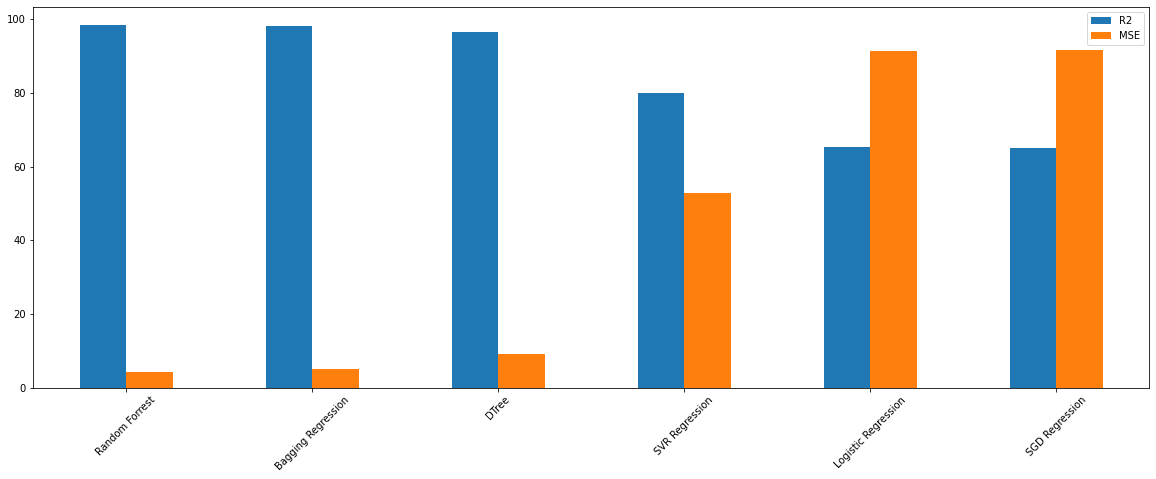

In [97]:
dataframe_no_grid_search.plot(rot=45,kind='bar',figsize=(20,7))

On peut voir d'après les résultats que Random Forrest, Bagging et Dtree performent mieux sur ce dataset car leur r2 est le meilleur (ils déterminent quasiment 100% de la distribution des données) tout en gardant un mse très bas (les modèles sont proches des données et donc plus précis). Nous allons maintenant chercher les meilleurs hyperparamètres sur ces derniers grâce à la gridsearch.

## GridSearchCV pour les meilleurs hyperparamètres

In [98]:
r2_optimal = {}
mse_optimal = {}

### Decision Tree

In [99]:
params = {"criterion" : ["mse", "friedman_mse"], #, "mae", "poisson"
         "splitter" : ["best","random"],
         "min_samples_split": [3,5,7,10],
         "min_samples_leaf": [3,5,7,10],
         "max_features":["auto","sqrt","log2",None]}
         
gridSearch = GridSearchCV(tree.DecisionTreeRegressor(), params, n_jobs=-1)

gridSearch.fit(X_train, Y_train)

print (f"Le meilleur score est {gridSearch.best_score_ * 100} avec ces hyperparameters :\n {gridSearch.best_estimator_}")  

model = gridSearch.best_estimator_

r2_optimal["DTree"] = [round(gridSearch.best_estimator_.score(X_test,Y_test) * 100,2)]
mse_optimal["DTree"]= [round(mean_squared_error(Y_test,gridSearch.best_estimator_.predict(X_test)),2)]

Le meilleur score est 95.97576103013637 avec ces hyperparameters :
 DecisionTreeRegressor(max_features='auto', min_samples_leaf=3,
                      min_samples_split=5)


### Bagging

In [104]:
params = {"n_estimators" : [50,100,125,150, 200],
         "oob_score" : [True,False],
         "max_samples":[0.2,0.5,0.7,1.0],
         "max_features":[0.2,0.5,0.7,1.0],
         }
         
gridSearch = GridSearchCV(BaggingRegressor(), params, n_jobs=-1)

gridSearch.fit(X_train, Y_train)

print (f"Le meilleur score est {gridSearch.best_score_ * 100} avec ces hyperparameters :\n {gridSearch.best_estimator_}")  

model = gridSearch.best_estimator_

r2_optimal["Bagging Regression"] = [round(gridSearch.best_estimator_.score(X_test,Y_test) * 100,2)]
mse_optimal["Bagging Regression"]= [round(mean_squared_error(Y_test,gridSearch.best_estimator_.predict(X_test)),2)]

Le meilleur score est 97.97726772819578 avec ces hyperparameters :
 BaggingRegressor(n_estimators=200)


### Random Forest

In [105]:
params = {"n_estimators" : [10,50,100],
         "max_depth" : [None,50,100],
         "min_samples_split":[3,5,10],
         "min_samples_leaf": [3,5,10],
         "oob_score":[True,False]
         }
         
gridSearch = GridSearchCV(RandomForestRegressor(), params, n_jobs=-1)

gridSearch.fit(X_train, Y_train)

print (f"Le meilleur score est {gridSearch.best_score_ * 100} avec ces hyperparameters :\n {gridSearch.best_estimator_}")  

model = gridSearch.best_estimator_

r2_optimal["Random Forrest"] = [round(gridSearch.best_estimator_.score(X_test,Y_test) * 100,2)]
mse_optimal["Random Forrest"]= [round(mean_squared_error(Y_test,gridSearch.best_estimator_.predict(X_test)),2)]

Le meilleur score est 97.39855983621366 avec ces hyperparameters :
 RandomForestRegressor(min_samples_leaf=3, min_samples_split=5, oob_score=True)


### Conclusion et choix du modèle

In [106]:
resultats_opti = pd.DataFrame.from_dict(r2_optimal).T
MSE_opti = pd.DataFrame.from_dict(mse_optimal).T

dataframe_grid_search = pd.concat([resultats_opti,MSE_opti],axis = 1)
dataframe_grid_search.columns = ["R2 Opti","MSE Opti"]
dataframe_grid_search = dataframe_grid_search.sort_values(by='R2 Opti',ascending=False)

dataframe_grid_search

,R2 Opti,MSE Opti
Bagging Regression,98.31,4.45
Random Forrest,97.83,5.70
DTree,96.37,9.53


<AxesSubplot:>

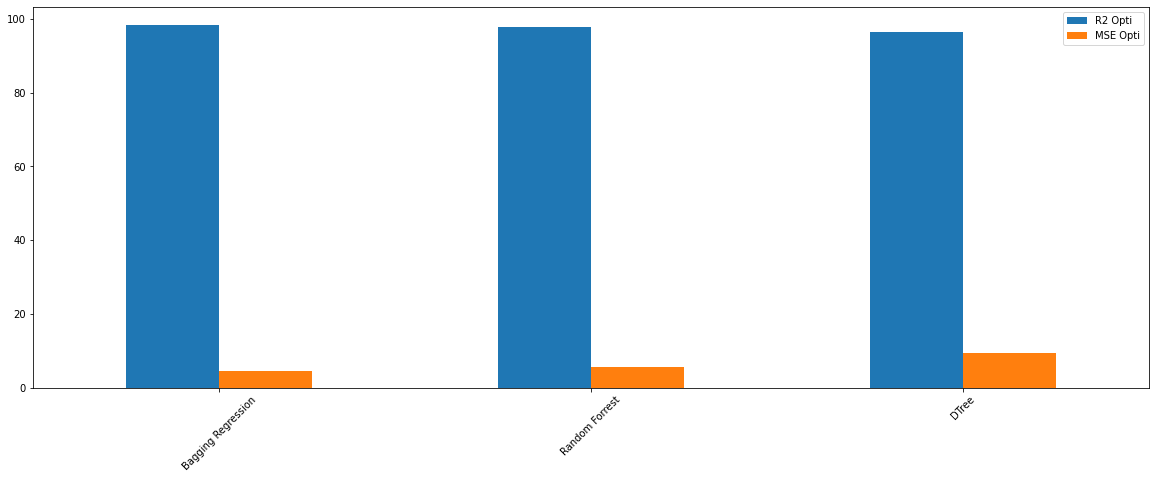

In [107]:
dataframe_grid_search.plot(rot=45,kind='bar',figsize=(20,7))

On peut en conclure que le modèle utilisant une Bagging regression est plus précis car il a un coefficient de détermination meilleure et plus proche de 100%. De plus, on a une moyenne mse moindre. On opeut se demander si le modèle est en overfitting ou pas et que les réponses sont déterminés avant même d'avoir fait le calcul. Cependant, le contexte du transcodage est important, en effet, on voit dans les données que les temps sont très similaires et donc "plus faciles" à prévoir.
On va donc garder ce modèle de bagging pour notre api.

## API

In [110]:
import pickle

#On redéfinit notre modèle avec les meilleurs hyperparamètres.

final_model = BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=0.925, max_samples=1.0, n_estimators=175,
                 n_jobs=None, oob_score=True, random_state=10, verbose=0,
                 warm_start=False)

model_pickle = final_model.fit(X_train,Y_train)

# On va remontrer les résultats de ce modèle final (r2 et mse)

pred = model_pickle.predict(X_test)

print(f"Modèle final : R2 = {round(model_pickle.score(X_test,Y_test) * 100,2)} %  et MSE = {round(mean_squared_error(Y_test,pred),2)}.")

cross_val = cross_val_score(model_pickle,X_train,Y_train,cv=5)

print(f"\nAvec la cross-validation, on a :\n\n{cross_val}")

Modèle final : R2 = 98.32 %  et MSE = 4.42.

Avec la cross-validation, on a :

[0.98051716 0.98430142 0.97950927 0.97552612 0.98128024]


In [116]:
pickle.dump(model_pickle, open('model/final_model.pickle', 'wb'))

#modèle pour l'api

In [117]:
# on prend le one hot encoder et le scaler pour les différentes requêtes

pickle.dump(scaler,open('model/scaler.pickle','wb'))
pickle.dump(one_hot_encoder,open('model/hotencoder.pickle','wb'))